In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True


In [2]:
def RK4(f, t_span, dt, x0, const, ftype=float):
    t      = np.arange(t_span[0], t_span[1]+dt, dt)
    x_n    = np.zeros((len(t), len(x0)), dtype=ftype)
    x_n[0] = x0
    for i in range(len(t)-1):
        k1 = dt * f(t[i], x_n[i], const)
        k2 = dt * f(t[i] + 0.5*dt, x_n[i] + 0.5*k1, const)
        k3 = dt * f(t[i] + 0.5*dt, x_n[i] + 0.5*k2, const)
        k4 = dt * f(t[i] + dt, x_n[i] + k3, const)
        x_n[i+1] = x_n[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return t, x_n

In [3]:
def customize_axes(ax):
    # Hide top/right spines
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Get current axis limits
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # X-axis placement: at y=0 if 0 is inside ylim, else at bottom
    if ylim[0] < 0 < ylim[1]:
        ax.spines['bottom'].set_position(('data', 0))
    else:
        ax.spines['bottom'].set_position(('outward', 0))

    # Y-axis placement: at x=0 if 0 is inside xlim, else at left
    if xlim[0] < 0 < xlim[1]:
        ax.spines['left'].set_position(('data', 0))
    else:
        ax.spines['left'].set_position(('outward', 0))

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')


**4.6.1** <span style="color:red">(Current and voltage oscillations)                                                                                                               
Consider a Josephson junction in the overdamped limit $\beta=0$.                                                                                                 
a) Sketch the supercurrent $I_{\tiny c}\sin\phi(t)$ as a function of $t$, assuming first that $I/I_{\tiny c}$ is slightly greater than $1,$ and then assuming that $I/I_{\tiny c}>>1$.                                                                                                                          
$\quad$( Hint : In each case, visualize the flow on the circle, as given by Equation (4.6.7).)                                                                           
b) Sketch the instantaneous voltage $V(t)$ for the two cases considered in (a).

From Equation (4.6.7)$ \quad\displaystyle \dot{\phi}= \frac{I}{I_{\tiny c}} - \sin\phi$


The Josephson relation, 

$ \qquad\displaystyle V(t)=\frac{\hbar}{2e}\dot{\phi}=\frac{\hbar}{2e}\left(\frac{I}{I_{\tiny c}} - \sin\phi\right)$

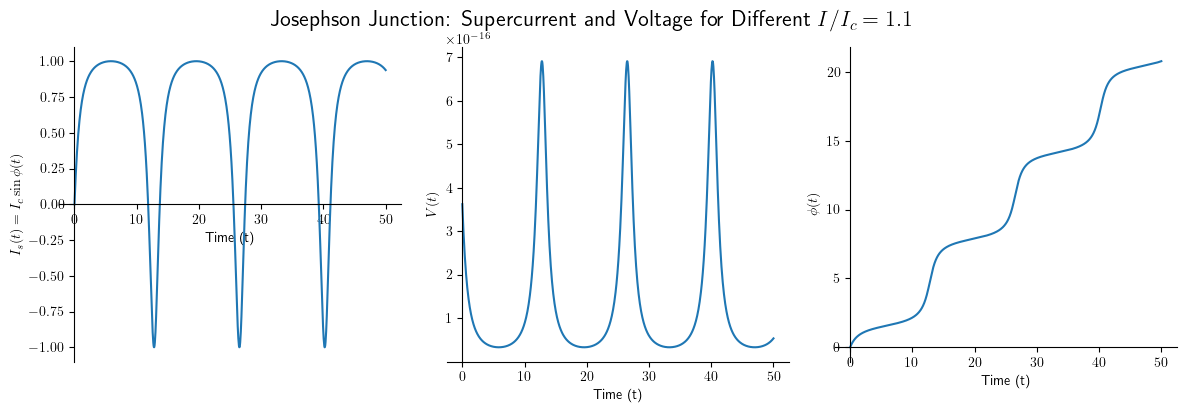

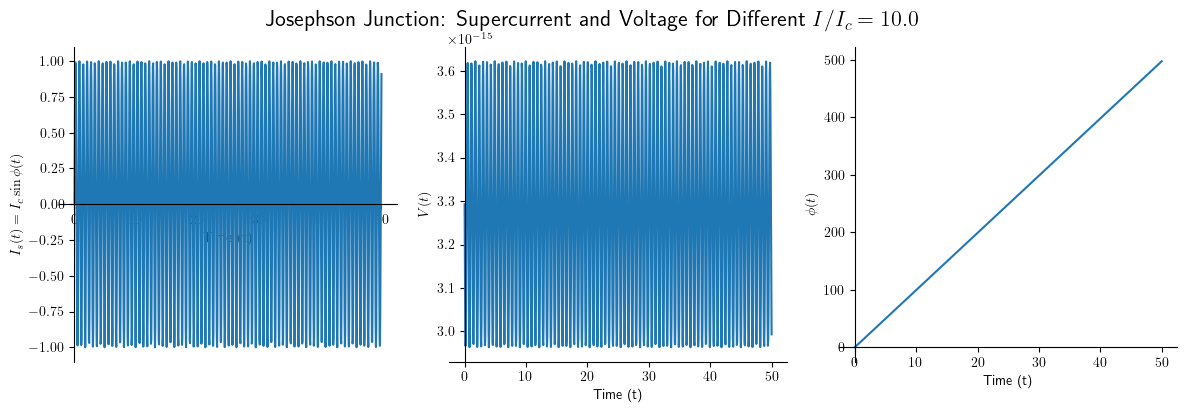

In [4]:
def simulate_phi(I_over_Ic, t, phi0=0.0):
    dt = t[1] - t[0]
    phi = np.zeros_like(t)
    phi[0] = phi0
    for i in range(1, len(t)):
        phi_dot = I_over_Ic - np.sin(phi[i-1])
        phi[i] = phi[i-1] + phi_dot * dt
    return phi

hbar = 1.055e-34     # Reduced Planck constant (J.s)
e    = 1.602e-19     # Elementary charge (C)
Ic   = 1.0           # Critical current (normalized units)
t    = np.linspace(0, 50, 1000)  # Time array
prefactor = hbar / (2 * e)

for i, I_over_Ic in enumerate([1.1,10.0]):
    phi = simulate_phi(I_over_Ic, t)
    I_s = Ic * np.sin(phi)
    V   = prefactor * (I_over_Ic - np.sin(phi))

    fig, axs = plt.subplots(1, 3, figsize=(12, 4), sharex=True)

    # Supercurrent plots
    axs[0].plot(t, I_s)
    axs[0].set_ylabel(r'$I_s(t) = I_c \sin\phi(t)$')
    axs[0].set_xlabel('Time (t)')
    customize_axes(axs[0])

    # Voltage plots
    axs[1].plot(t, V)
    axs[1].set_ylabel(r'$V(t)$')
    axs[1].set_xlabel('Time (t)')
    customize_axes(axs[1])

    axs[2].plot(t, phi)
    axs[2].set_ylabel(r'$\phi(t)$')
    axs[2].set_xlabel('Time (t)')
    customize_axes(axs[2])

    plt.tight_layout()
    fig.suptitle(rf'Josephson Junction: Supercurrent and Voltage for Different $I/I_c={I_over_Ic}$', fontsize=16, y=1.02)
    plt.show()

**4.6.2** <span style="color:red">(Computer work)                                                                                                                                     
Check your qualitative solution to Exercise 4.6.1 by integrating Equation (4.6.7) numerically, and plotting the graphs of $I_c\sin\phi(t)$ and $V(t)$.

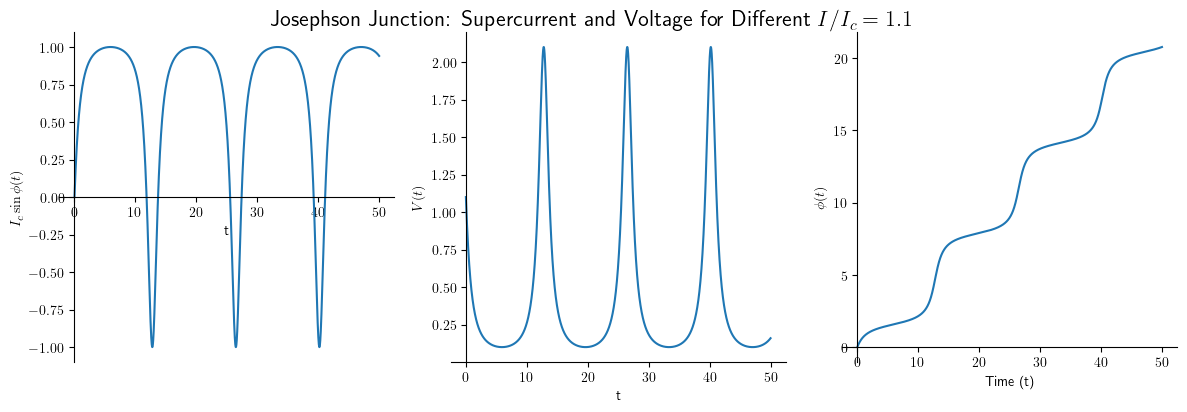

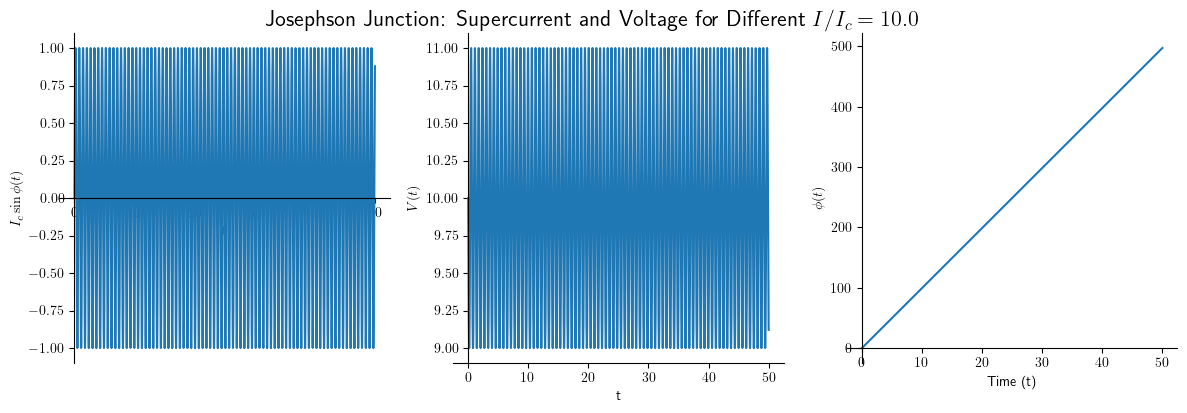

In [5]:
Ic           = 1.0
hbar_over_2e = 1.0   
t_span       = (0.0, 50.0)
dt           = 0.01
phi0         = [0.0]

def f(t, phi_vec, I_over_Ic):
    phi = phi_vec[0]
    return np.array([I_over_Ic - np.sin(phi)])

for i,Ival in enumerate([1.1 , 10.]):
    t, phi_mat = RK4(f, t_span, dt, phi0, Ival)
    phi = phi_mat[:,0]
    Is = Ic * np.sin(phi)
    V  = hbar_over_2e * (Ival - np.sin(phi))
    fig, axes = plt.subplots(1, 3, figsize=(12,4), sharex='col')

    axes[0].plot(t, Is)
    axes[0].set_xlabel("t")
    axes[0].set_ylabel("$I_c\\sin\\phi(t)$")
    customize_axes(axes[0])
    
    axes[1].plot(t, V)
    axes[1].set_ylabel("$V(t)$")
    axes[1].set_xlabel("t")
    customize_axes(axes[1])

    axes[2].plot(t, phi)
    axes[2].set_ylabel(r'$\phi(t)$')
    axes[2].set_xlabel('Time (t)')
    customize_axes(axes[2])

    plt.tight_layout( )
    fig.suptitle(rf'Josephson Junction: Supercurrent and Voltage for Different $I/I_c={Ival}$', fontsize=16, y=1.02)
    plt.show()

**4.6.3** <span style="color:red">(Washboard potential)                                                                                                                          
Here’s another way to visualize the dynamics of an overdamped Josephson junction.                                                
As in Section 2.7, imagine a particle sliding down a suitable potential.

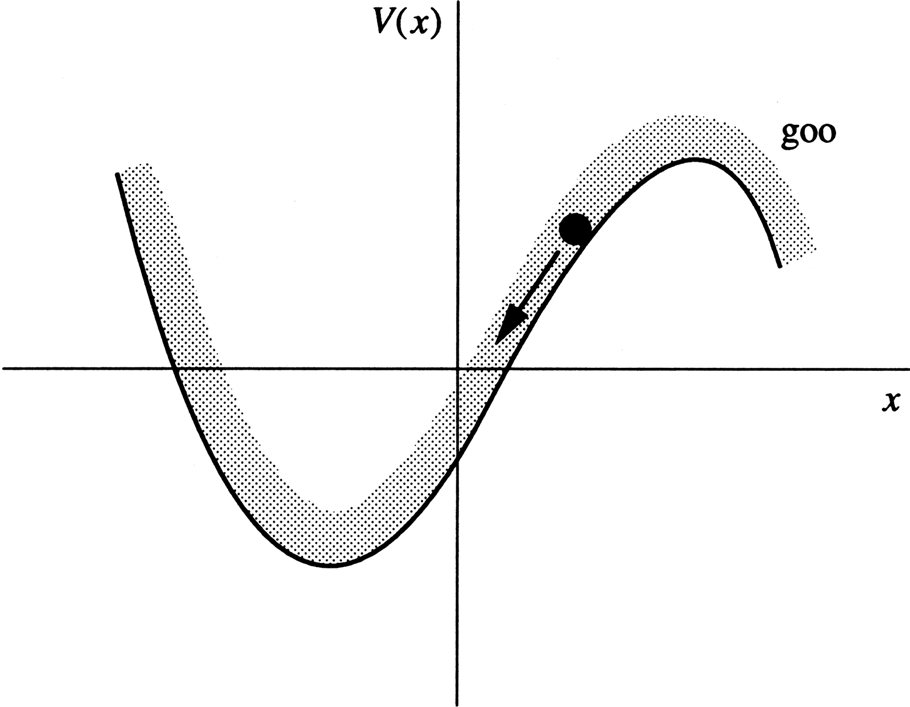

<span style="color:red">a) Find the potential function corresponding to Equation (4.6.7). Show that it is not a single-valued function on the circle.                           
b) Graph the potential as a function of $\phi$, for various values of $I / I_c$ . Here $\phi$ is to be regarded as a real number, not an angle.               
c) What is the effect of increasing $I$ ?                                                                                                                   
The potential in (b) is often called the “washboard potential” (**Van Duzer and Turner 1981, p. 179**) because its shape is reminiscent of a tilted, corrugated washboard.

a)

From  Equation (4.6.7) $\dot{\phi}=\frac{I}{I_c}-\sin{\phi}$

$\dot{\phi}=-\frac{dV}{d\phi}=\frac{I}{I_c}-\sin{\phi} \Rightarrow V(\phi)=-\frac{I}{I_c}\phi-\cos{\phi}$

$ V(\phi)\ne V(\phi + 2\pi)$

So $ V(\phi)$ is not a single-valued function on the circle.

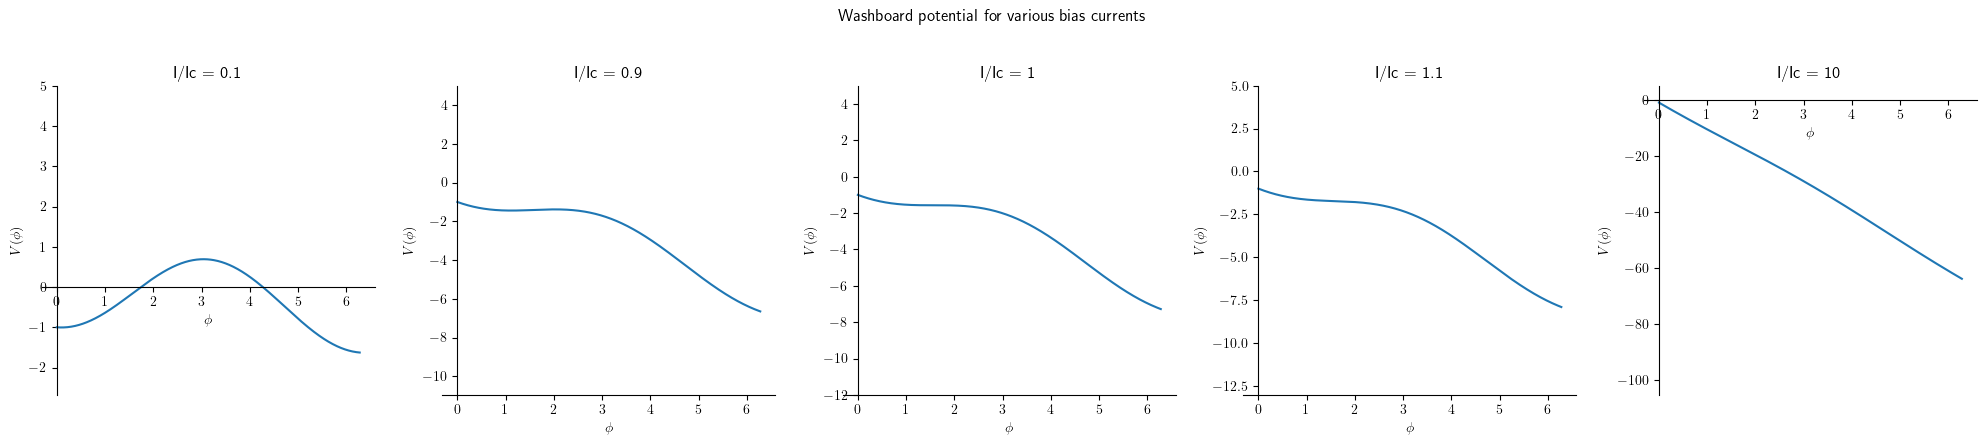

In [6]:
def V(phi, I, Ic=1.0):
    return -(I/Ic)*phi - np.cos(phi)

phi    = np.arange(0, 2*np.pi, 0.01)
I_list = [0.1, 0.9, 1, 1.1, 10]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
axes      = axes.flatten()

for i, I in enumerate(I_list):
    ax = axes[i]
    V_p=V(phi, I)
    ax.plot(phi, V_p)
    ax.set_title(f'I/Ic = {I}')
    ax.set_xlabel(r'$\phi$')
    ax.set_ylabel(r'$V(\phi)$')
    customize_axes(ax)
    y_min, y_max = np.min(V_p), np.max(V_p)
    ax.set_ylim([1.5*(y_min - 0.1*abs(y_min)), 5])

plt.tight_layout()
fig.suptitle('Washboard potential for various bias currents',y=1.1)
plt.show()

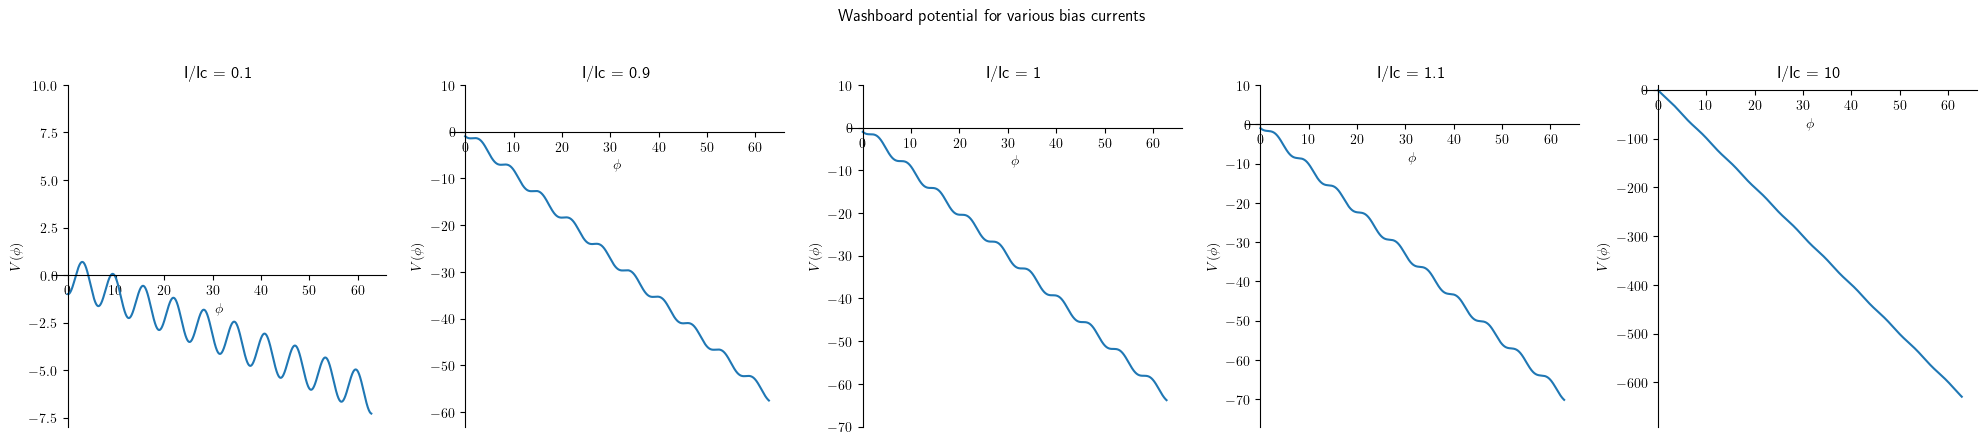

In [7]:
phi    = np.arange(0, 20*np.pi, 0.01)
I_list = [0.1, 0.9, 1, 1.1, 10]

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
axes      = axes.flatten()

for i, I in enumerate(I_list):
    ax = axes[i]
    V_p=V(phi, I)
    ax.plot(phi, V_p)
    ax.set_title(f'I/Ic = {I}')
    ax.set_xlabel(r'$\phi$')
    ax.set_ylabel(r'$V(\phi)$')
    customize_axes(ax)
    y_min, y_max = np.min(V_p), np.max(V_p)
    ax.set_ylim([y_min - 0.1*abs(y_min), 10])

plt.tight_layout()
fig.suptitle('Washboard potential for various bias currents',y=1.1)
plt.show()

c)

Increasing I brings the potential well and hill closer together, which eventually collide and annihilate.

**4.6.4** <span style="color:red">(Resistively loaded array)                                                                                                                        
Arrays of coupled Josephson junctions raise many fascinating questions. Their dynamics are not yet understood in detail.                                  
The questions are technologically important because arrays can produce much greater power output than a single junction,                                   
and also because arrays provide a reasonable model of the (still mysterious) high-temperature superconductors.                                                                  
For an introduction to some of the dynamical questions of interest, see **Tsang et al. (1991)** and **Strogatz and Mirollo (1993)**.                                                                                          
Figure shows an array of two identical overdamped Josephson junctions.                                                                                     
The junctions are in series with each other, and in parallel with a resistive “load” $R$.

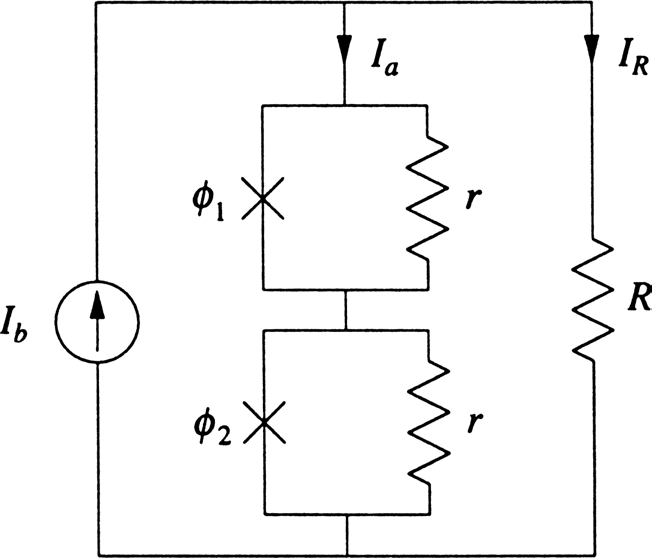

<span style="color:red">The goal of this exercise is to derive the governing equations for this circuit.                                                                         
In particular, we want to find differential equations for $\phi_{\tiny 1}$ and $\phi_{\tiny 2}$.                                                                                           
a) Write an equation relating the $dc$ bias current $I_b$ to the current $I_a$ flowing through the array and the current $I_R$ flowing through the load resistor.                                                                                                                                              
b) Let $V_{\tiny 1}$ and $V_{\tiny 2}$ denote the voltages across the first and second Josephson junctions. Show that $\displaystyle I_a=I_c\sin\phi_{\tiny 1}+\frac{V_{\tiny 1}}{r}$ and $\displaystyle I_a=I_c\sin\phi_{\tiny 2}+\frac{V_{\tiny 2}}{r}$.                                                                                                       
c) Let $k = 1, 2$ . Express $V_{\tiny k}$ in terms of $\dot{\phi}_{\tiny k}$.                                                                                  
d) Using the results above, along with Kirchhoff’s voltage law, show that                                                                                   
$ \qquad\displaystyle I_{\tiny b}=I_{\tiny c}\sin\phi_{\tiny k}+\frac{\hbar}{2er}\dot{\phi}_k+\frac{\hbar}{2eR}\left(\dot{\phi}_{\tiny 1}+\dot{\phi}_{\tiny 2}\right)$ for $k=1,2$                  
e) The equations in part (d) can be written in more standard form as equations for $\dot{\phi}_{\tiny k}$, as follows.                                 
Add the equations for $k = 1, 2,$ and use the result to eliminate the term $\left(\dot{\phi}_{\tiny 1}+\dot{\phi}_{\tiny 2}\right)$.                     
Show that the resulting equations take the form                                                                                                                 
$ \qquad\displaystyle\dot{\phi}_{\tiny k}=\Omega + a\sin{\phi}_{\tiny k} + K\sum_{j=1}^2 \sin\phi_j \, , $                                                          
and write down explicit expressions for the parameters $\Omega, a, K$.

We have,

* Two **identical Josephson junctions** in series.
* The array is **in parallel with a load resistor** $R$.
* Each junction has **critical current** $I_c$ and **shunt resistance** $r$.
* DC bias current: $I_b$ enters the circuit.

We denote:

$ \qquad\displaystyle\phi_1, \phi_2 = \text{phase differences across the junctions}$

$ \qquad\displaystyle V_1, V_2 = \text{voltages across the junctions}$

$ \qquad\displaystyle I_a = \text{current through series array}$

$ \qquad\displaystyle I_{\tiny R} = \text{current through the load resistor } R $

#### a) Current relation

The **current entering the parallel combination** is split:

$ \qquad\displaystyle \text{Kirchhoff’s current law  : } I_b = I_a + I_R$

#### b) Current through each junction 

A Josephson junction is modeled as **two parallel elements**:

1. **Supercurrent branch**: carries $I_c \sin \phi_k$, where $\phi_k$ is the phase difference across the junction.
2. **Resistive branch**: carries current $V_k / r$, where $V_k$ is the voltage across the junction and $r$ is the shunt resistance.

This is represented as a parallel combination:

$ \qquad\displaystyle\text{Total junction current } I_{\text{junction}} = I_{\text{supercurrent}} + I_{\text{resistive}}$

For junction $k$ ($k = 1,2$):

$ \qquad\displaystyle I_{\text{supercurrent}} = I_c \sin \phi_k $

$ \qquad\displaystyle I_{\text{resistive}} = \frac{V_k}{r} $

So the **total current through junction $k$**:

$ \qquad\displaystyle\boxed{I_{\text{junction},k} = I_c \sin \phi_k + \frac{V_k}{r}}$

In the circuit, the **two junctions are in series**, so the **same current $I_a$** flows through both junctions:

$ \qquad\displaystyle I_a = I_{\text{junction},1} = I_{\text{junction},2}$

Substitute the expressions from Step 2:

$ \qquad\displaystyle \begin{aligned} I_a &= I_c \sin \phi_1 + \frac{V_1}{r} \\ I_a &= I_c \sin \phi_2 + \frac{V_2}{r} \end{aligned}$

#### c) Voltage in terms of phase 

From the **Josephson voltage relation**:

$ \qquad\displaystyle V_k = \frac{\hbar}{2 e} \dot{\phi}_k  \quad \text{ for } k = 1,2 $

Substitute into part (b),

$ \qquad\displaystyle I_a = I_c \sin \phi_k + \frac{\hbar}{2 e r} \dot{\phi}_k $

#### d) Current through load resistor

The **load resistor R** is in parallel with the array, so voltage across $R$ is:

$ \qquad\displaystyle V_R = V_1 + V_2$

* Resistor current : $\displaystyle I_R = \frac{V_R}{R} = \frac{(V_1 + V_2)}{R} = \frac{\hbar}{2 e R} (\dot{\phi}_1 + \dot{\phi}_2)$

Kirchhoff’s current law (from step 1),  $ \quad\displaystyle I_b = I_a + I_R $

Substitute $\displaystyle I_a = I_c \sin \phi_k + \frac{\hbar}{2 e r} \dot{\phi}_k$

$ \qquad\displaystyle \boxed{I_b = I_c \sin \phi_k + \frac{\hbar}{2 e r} \dot{\phi}_k + \frac{\hbar}{2 e R} (\dot{\phi}_1 + \dot{\phi}_2)}, \quad k=1,2$

#### e) Standard form 

Let, $\displaystyle\alpha = \frac{\hbar}{2 e r}, \quad \beta = \frac{\hbar}{2 e R}$

Then the equations become,

$ \qquad\displaystyle \alpha \dot{\phi}_k + \beta (\dot{\phi}_1 + \dot{\phi}_2) = I_b - I_c \sin \phi_k $

Or explicitly for $k=1,2$:

$ \qquad\displaystyle \begin{cases} (\alpha + \beta) \dot{\phi}_1 + \beta \dot{\phi}_2 = I_b - I_c \sin \phi_1 \\ \beta \dot{\phi}_1 + (\alpha + \beta) \dot{\phi}_2 = I_b - I_c \sin \phi_2 \end{cases}$

 This is a **linear system in $\dot{\phi}_1, \dot{\phi}_2$**.

Then the Matrix form is,

$ \qquad\displaystyle\begin{pmatrix} \alpha + \beta & \beta \\ \beta & \alpha + \beta \end{pmatrix}  \begin{pmatrix} \dot{\phi}_1 \\ \dot{\phi}_2 \end{pmatrix} = \begin{pmatrix} I_b - I_c \sin \phi_1 \\ I_b - I_c \sin \phi_2 \end{pmatrix}$

* Determinant: $(\alpha + \beta)^2 - \beta^2 = \alpha^2 + 2 \alpha \beta$
* Inverse of $2\times 2$ matrix:

$ \qquad\displaystyle \begin{pmatrix} \dot{\phi}_1 \\ \dot{\phi}_2 \end{pmatrix} = \frac{1}{\alpha^2 + 2 \alpha \beta}  \begin{pmatrix} \alpha + \beta & -\beta \\ -\beta & \alpha + \beta \end{pmatrix} \begin{pmatrix} I_b - I_c \sin \phi_1 \\ I_b - I_c \sin \phi_2 \end{pmatrix}$ 


$ \qquad\displaystyle\dot{\phi}_1 = \frac{ (\alpha + \beta)(I_b - I_c \sin \phi_1) - \beta (I_b - I_c \sin \phi_2) }{\alpha^2 + 2 \alpha \beta}$

$ \qquad\displaystyle\dot{\phi}_1 = \frac{ \alpha I_b - (\alpha + \beta) I_c \sin \phi_1 + \beta I_c \sin \phi_2 }{\alpha^2 + 2 \alpha \beta}$

Similarly,

$ \qquad\displaystyle\dot{\phi}_2 = \frac{ \alpha I_b - (\alpha + \beta) I_c \sin \phi_2 + \beta I_c \sin \phi_1 }{\alpha^2 + 2 \alpha \beta}$

Factor constants,

$ \qquad\displaystyle\dot{\phi}_1 = \underbrace{\frac{\alpha I_b}{\alpha^2 + 2 \alpha \beta}}_{\Omega} + \underbrace{-\frac{\alpha + \beta}{\alpha^2 + 2 \alpha \beta} I_c}_{a} \sin \phi_1 + \underbrace{\frac{\beta}{\alpha^2 + 2 \alpha \beta} I_c}_{K} \sin \phi_2$

This can be written as,

$ \qquad\displaystyle\dot{\phi}_k = \Omega + a \sin \phi_k + K \sum_{j=1}^{2} \sin \phi_j$

with,

$ \qquad\displaystyle\boxed{\Omega = \frac{\alpha I_b}{\alpha^2 + 2 \alpha \beta} = \frac{I_b}{r^{-1} + 2 R^{-1}} , \quad a = - \frac{\alpha + \beta}{\alpha^2 + 2 \alpha \beta} I_c = - \frac{I_c}{r^{-1} + 2 R^{-1}}, \quad K = \frac{\beta I_c}{\alpha^2 + 2 \alpha \beta} = \frac{R^{-1} I_c}{(r^{-1} + 2 R^{-1})(r^{-1} + R^{-1})}}$


We have proved rigorously that the **RSJ** model for a two-junction resistively loaded array reduces to

$ \qquad\displaystyle\dot{\phi}_k = \Omega + a \sin \phi_k + K \sum_{j=1}^{2} \sin \phi_j \, ,\quad k=1,2$ 

with explicit expressions for $\Omega,a,K$.

**4.6.5** <span style="color:red">($N$ junctions, resistive load) Generalize Exercise 4.6.4 as follows. Consider an array of $N$ Josephson junctions in series.                                                                                                            
As before, assume the array is in parallel with a resistive load $R$, and that the junctions are identical, overdamped, and driven by a constant bias current $I_b$. 

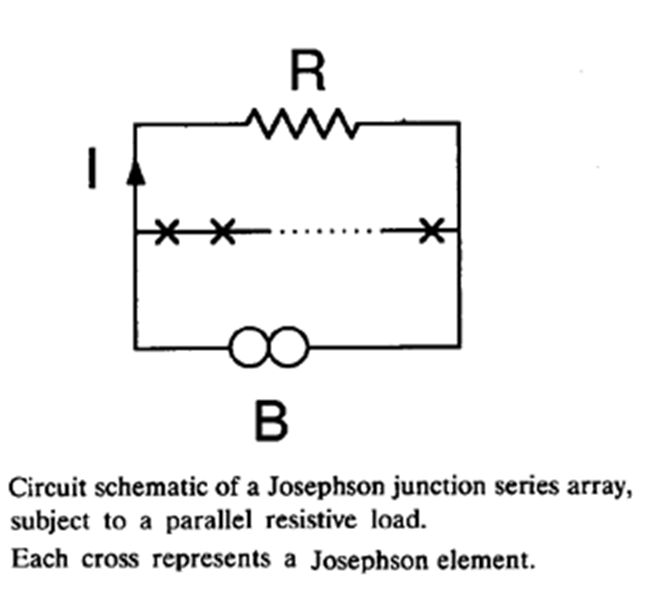

                                                                      
<span style="color:red">Show that the governing equations can be written in dimensionless form as                                                                                       
<span style="color:red">$ \qquad\displaystyle\frac{d\phi_{\tiny k}}{d\tau}=\Omega + a\sin\phi_{\tiny k}+\frac{1}{N}\sum_{j=1}^N\sin\phi_{\tiny j} \ ,\quad \text{ for } k=1,2,\dots,N.$                                                                                                                                    
<span style="color:red">and write down explicit expressions for the dimensionless groups $\Omega$ and $a$ and the dimensionless time $\tau$.                                          
(See Example 8.7.4 and **Tsang et al. (1991)** for further discussion.)

#### Josephson Junction Array with Resistive Load

We consider an array of $N$ identical overdamped Josephson junctions in series,                                                                         
biased by a constant current $I_b$ and shunted by a load resistor $R$ in parallel.
Each junction has critical current $I_c$ and shunt resistance $r$.

For junction $k$, the **Resistively Shunted Junction (RSJ)** model gives,

$ \qquad\displaystyle I_{\text{arr}} = I_c \sin\phi_k + \frac{V_k}{r},  \qquad V_k = \frac{\hbar}{2e}\dot{\phi}_k.$

* The first term is the **supercurrent** ($I_c \sin\phi_k$),
* The second is the **resistive current** through shunt $r$,
* The Josephson relation connects voltage and phase.

#### Array voltage and load current

Since the junctions are in series,

$ \qquad\displaystyle V_{\text{arr}} = \sum_{j=1}^N V_j = \frac{\hbar}{2e}\sum_{j=1}^N \dot{\phi}_j.$

The parallel load resistor carries current

$ \quad\displaystyle I_R = \frac{V_{\text{arr}}}{R} = \frac{\hbar}{2eR}\sum_{j=1}^N \dot{\phi}_j.$

##### Kirchhoff’s law

Total bias current splits,

$ \qquad\displaystyle I_b = I_R + I_{\text{arr}}.$

So for junction $k$:

$ \qquad\displaystyle I_b - \frac{\hbar}{2eR}\sum_{j=1}^N \dot{\phi}_j = I_c \sin\phi_k + \frac{\hbar}{2er}\dot{\phi}_k. $

Multiply through by $\tfrac{2e}{\hbar}r$:

$ \qquad\displaystyle \dot{\phi}_k + \frac{r}{R}\sum_{j=1}^N \dot{\phi}_j = \frac{2er}{\hbar}I_b - \frac{2er}{\hbar}I_c \sin\phi_k. \tag{1}$

This is the **dynamical equation** for the phase of junction $k$.

Let $S = \sum_j \dot{\phi}_j$. Summing (1) over $k$,

$ \qquad\displaystyle S + \frac{Nr}{R}S = \frac{2er}{\hbar}\Big(N I_b - I_c\sum_{j=1}^N \sin\phi_j\Big).$

Hence,                                                                                                                                                            
$ \qquad\displaystyle S(t) = \frac{2erR}{\hbar(R+Nr)}\Big(N I_b - I_c\sum_j \sin\phi_j\Big). \tag{2}$

Inserting (2) into (1):

$ \qquad\displaystyle \dot{\phi}_k  = \frac{2erR}{\hbar(R+Nr)}I_b - \frac{2er}{\hbar}I_c \sin\phi_k  + \frac{2er^2 I_c}{\hbar(R+Nr)} \sum_{j=1}^N \sin\phi_j. \tag{3}$

* The first term is a **constant drive from bias current**,
* The second term is the **nonlinear Josephson restoring current**,
* The third term couples all junctions **globally via the load resistor**.

#### Dimensionless scaling

We want a **dimensionless time variable** so that the mean coupling coefficient becomes $1/N$.

Write (3) as

$ \qquad\displaystyle \dot{\phi}_k = A_1 I_b + A_2 \sin\phi_k + A_3 \sum_j \sin\phi_j,$

with $ \quad\displaystyle A_1 = \frac{2erR}{\hbar(R+Nr)},\quad A_2 = -\frac{2erI_c}{\hbar},\quad A_3 = \frac{2er^2 I_c}{\hbar(R+Nr)}.$

Let choose $\displaystyle\tau = ct \Rightarrow \frac{d\tau}{dt}=c \Rightarrow \frac{d}{dt}=c\frac{d}{d\tau}$ with $ \quad\displaystyle c = A_3 N = \frac{2Ne r^2 I_c}{\hbar(R+Nr)}$ so  that $\displaystyle \frac{A_3}{c}=\frac{1}{N}$

So $ \qquad\displaystyle \tau = \frac{2Ne r^2 I_c}{\hbar(R+Nr)}t. $

#### Final dimensionless system

dividing (3) by $c$,

$ \qquad\displaystyle \frac{d\phi_k}{d\tau} = \frac{A_1 I_b}{c} + \frac{A_2}{c}\sin\phi_k + \frac{A_3}{c}\sum_{j=1}^N \sin\phi_j.$

$ \qquad\displaystyle \frac{d\phi_k}{d\tau} = \frac{R I_b}{N r I_c} - \frac{R+Nr}{Nr}\sin\phi_k + \frac{1}{N}\sum_{j=1}^N \sin\phi_j.$

$ \qquad\displaystyle \frac{d\phi_k}{d\tau} = \frac{R I_b}{N r I_c} + \left(- \frac{R+Nr}{Nr}\right)\sin\phi_k + \frac{1}{N}\sum_{j=1}^N \sin\phi_j.$        
This can be written as

$ \qquad\displaystyle \frac{d\phi_k}{d\tau} = \Omega + a \sin\phi_k + \frac{1}{N}\sum_{j=1}^N \sin\phi_j.$                                                       
On comparing we get the Coefficients :

$ \qquad\displaystyle \Omega = \frac{R I_b}{N r I_c}, \qquad a = -\frac{R+Nr}{Nr}.$

#### Insights

* The **bias current $I_b$** enters as a dimensionless drive $\Omega$.
* The **junction nonlinearity** appears as the local term $\displaystyle a \sin\phi_k$.
* The **resistive load $R$** couples all junctions globally through the $\displaystyle \frac{1}{N}\sum \sin\phi_j$ term.
* The negative $a$ reflects the dissipative character of the junction shunt.


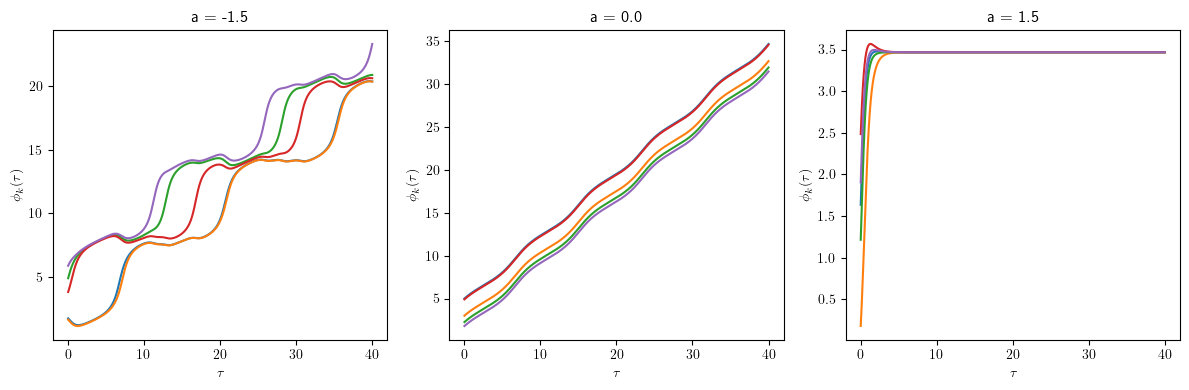

In [8]:
N        = 5
Omega    = 0.8
a_values = [-1.5, 0.0, 1.5]
Tmax     = 40
dt       = 0.01

def evolve_phi(N, Omega, a, Tmax, dt):
    phi = np.random.rand(N) * 2*np.pi  # random initial phases
    phis = [phi.copy()]
    for t in np.arange(0, Tmax, dt):
        dphi = Omega + a*np.sin(phi) + np.mean(np.sin(phi))
        phi = phi + dt * dphi
        phis.append(phi.copy())
    return np.array(phis)

time = np.arange(0, Tmax+dt, dt)

plt.figure(figsize=(12, 4))
for idx, a in enumerate(a_values):
    phis = evolve_phi(N, Omega, a, Tmax, dt)
    plt.subplot(1, 3, idx+1)
    for k in range(N):
        plt.plot(time, phis[:, k], label=f'φ_{k+1}')
    plt.title(f'a = {a}')
    plt.xlabel(r'$\tau$')
    plt.ylabel(r'$\phi_k(\tau)$')
    
plt.tight_layout()
plt.show()

**4.6.6** <span style="color:red">($N$ junctions, $RLC$ load)                                                                                                                           
Generalize Exercise 4.6.4 to the case where there are $N$ junctions in series,                                                                               
and where the load is a resistor $R$ in series with a capacitor $C$ and an inductor $L$.                                                                        
Write differential equations for $\phi_{\tiny k}$ and for $Q$, where $Q$ is the charge on the load capacitor.                 
(See **Strogatz and Mirollo 1993**.)

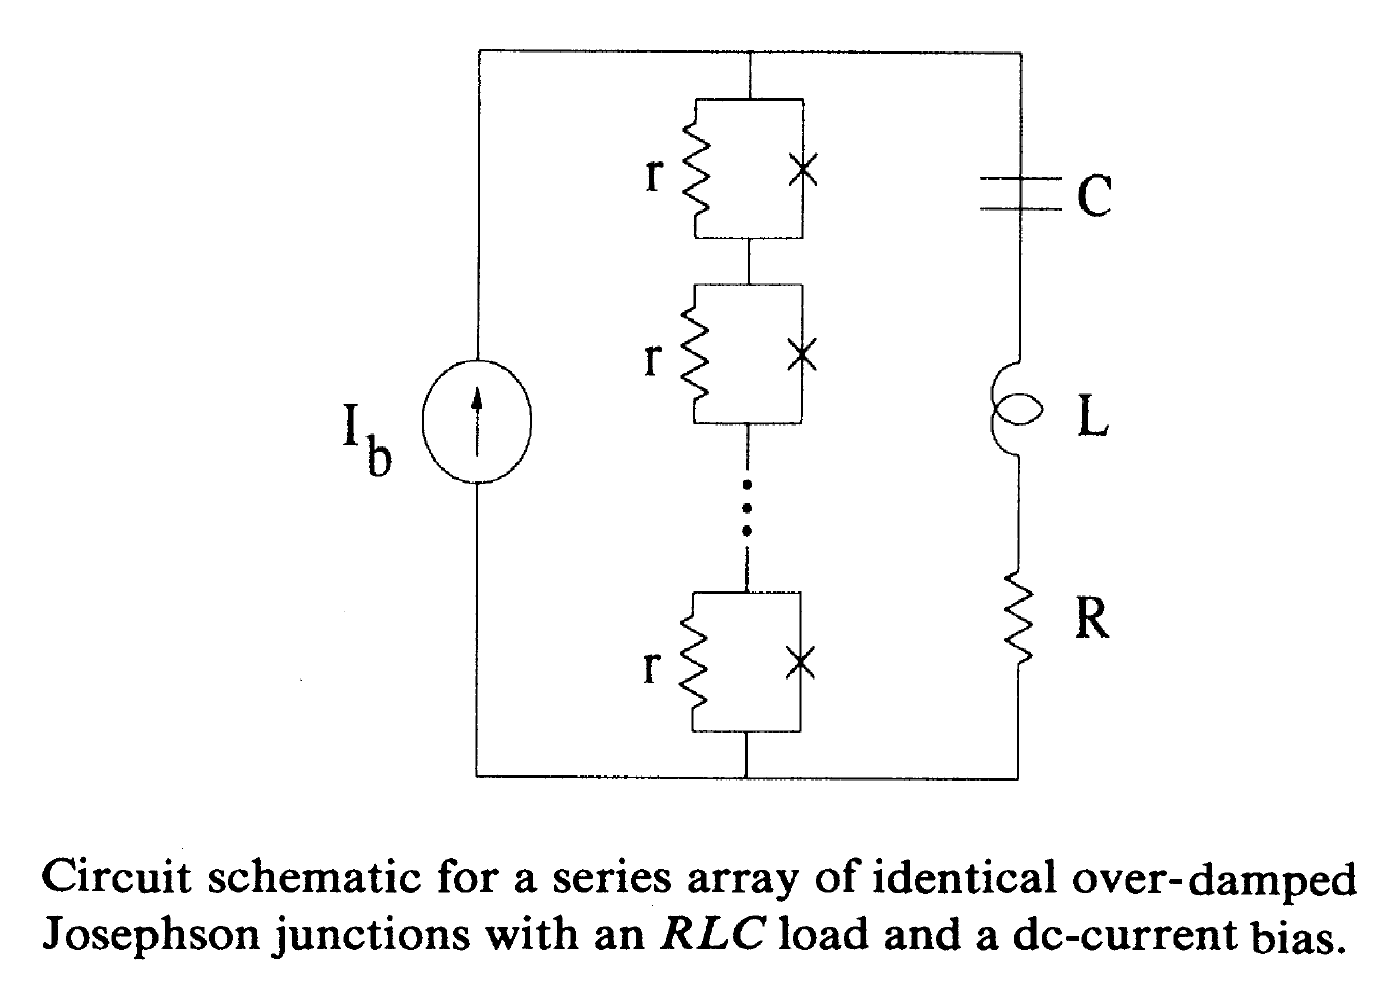

**System:** $N$ identical Josephson junctions in series with an $RLC$ load

**Dimensionless variables:**

$ \qquad\displaystyle
t = \omega_c t, \quad Q = \frac{\omega_c Q}{I_c}, \quad I_b = \frac{I_b}{I_c}, \quad L = \frac{\omega_c L}{r N}, \quad R = \frac{R}{r N}, \quad C = N \omega_c r C $

**Junction equations (overdamped)**

$ \qquad\displaystyle\boxed{\dot{\phi}_k + \sin \phi_k + \dot{Q} = I_b, \quad k = 1, \dots, N}$

**RLC load equation**

$ \qquad\displaystyle\boxed{L \ddot{Q} + R \dot{Q} + \frac{Q}{C} = \frac{1}{N} \sum_{j=1}^N \dot{\phi}_j}$

**6.6.9** <span style="color:red">(Josephson junction array)                                                                                                                                    
As discussed in Exercises 4.6.4 and 4.6.5, the equations

<span style="color:red">$ \qquad\displaystyle\frac{d\phi_{\tiny k}}{d\tau}=\Omega + a\sin\phi_{\tiny k}+\frac{1}{N}\sum_{j=1}^N\sin\phi_{\tiny j} \ ,\quad \text{ for } k=1,2.$                                                                                                                                              
<span style="color:red">arise as the dimensionless circuit equations for a resistively loaded array of Josephson junctions.                                                            
a) Let $\theta_{\tiny k}=\phi_{\tiny k} - \frac{\pi}{2},$ and show that the resulting system for $\theta_{\tiny k}$ is reversible.                                                     
b) Show that there are four fixed points $ (\text{mod } 2\pi)$ when $\begin{vmatrix} \frac{\Omega}{(a+1)} \end{vmatrix}  <1,$ and none when $\begin{vmatrix} \frac{\Omega}{(a+1)} \end{vmatrix} > 1.$                              
c) Using the computer, explore the various phase portraits that occur for $a=1,$ as $\Omega$ varies over the interval $0\le\Omega\le3.$                 
For more about this system, see **Tsang et al. (1991)**.

a.)

the equations
 
$ \qquad\displaystyle\frac{d\phi_{\tiny k}}{d\tau}=\Omega + a\sin\left(\phi_{\tiny k}\right)+\frac{1}{N}\sum_{j=1}^N\sin\left(\phi_{\tiny j}\right),\quad \text{ for } k=1,2.$

Given : $\theta_{\tiny k}=\phi_{\tiny k} - \frac{\pi}{2} \quad => \phi_{\tiny k} = \theta_{\tiny k}+\frac{\pi}{2}$       

$ \qquad\displaystyle\frac{d\phi_{\tiny k}}{d\tau}=\Omega + a\sin\left( \theta_{\tiny k}+{\small\frac{\pi}{2} }\right) +\frac{1}{N}\sum_{j=1}^N\sin\left( \theta_{\tiny j}+{\small\frac{\pi}{2}} \right),\quad \text{ for } k=1,2.$

$ \qquad\displaystyle\frac{d\theta_{\tiny k}}{d\tau}=\Omega + a\cos\left( \theta_{\tiny k} \right) +\frac{1}{N}\sum_{j=1}^N\cos\left( \theta_{\tiny j} \right),\quad \text{ for } k=1,2.$

Applying the transformation $ i.e., \quad \theta_{\tiny j}\rightarrow -\theta_{\tiny j} \ \&  \ \tau\rightarrow-\tau$

$ \qquad\displaystyle\frac{-1 \cdot d\theta_{\tiny k}}{-1 \cdot d\tau}=\Omega + a\cos\left( -\theta_{\tiny k} \right) +\frac{1}{N}\sum_{j=1}^N\cos\left( -\theta_{\tiny j} \right),\quad \text{ for } k=1,2.$

$ \qquad\displaystyle\frac{d\theta_{\tiny k}}{d\tau}=\Omega + a\cos\left( \theta_{\tiny k} \right) +\frac{1}{N}\sum_{j=1}^N\cos\left( \theta_{\tiny j} \right),\quad \text{ for } k=1,2.$

Since there is no change, thus the system is reversible.



b.)

We want fixed points, so set $\dot\theta_k=0$:

$ \qquad\displaystyle 0=\Omega+a\cos\theta_k+\tfrac12\big(\cos\theta_1+\cos\theta_2\big),\quad k=1,2.$

This gives the linear system in $x=\cos\theta_1,\ y=\cos\theta_2$:

$ \qquad\displaystyle\begin{cases}(a+\tfrac12)\,x+\tfrac12\,y=-\Omega,\\  \tfrac12\,x+(a+\tfrac12)\,y=-\Omega. \end{cases}$

Subtracting yields $(a)\,(x-y)=0$. For $a\neq 0$ we get $x=y$. Plug back:

$ \qquad\displaystyle\big(a+\tfrac12+\tfrac12\big)x=(a+1)x=-\Omega \;\;\Rightarrow\;\; x=y=-\frac{\Omega}{a+1}.$

Thus any fixed point must satisfy

$ \qquad\displaystyle\cos\theta_1=\cos\theta_2=-\frac{\Omega}{a+1}.$

Existence/count (mod $2\pi$):

* If $\left|\frac{\Omega}{a+1}\right|<1$, each cosine equation has two solutions in $[0,2\pi)$; taking $\theta_1=\theta_2$ gives 4 synchronous fixed points (two distinct angles, each with its $\pi$-shift partner).
* If $\left|\frac{\Omega}{a+1}\right|=1$, the two roots coalesce, giving **two** fixed points (a saddle-node collision).
* If $\left|\frac{\Omega}{a+1}\right|>1$, **no** fixed points exist.



In [9]:
def vector_field(theta1, theta2, Omega, a=1.0):
    c1, c2 = np.cos(theta1), np.cos(theta2)
    d1 = Omega + a*c1 + 0.5*(c1 + c2)
    d2 = Omega + a*c2 + 0.5*(c1 + c2)
    return d1, d2

In [10]:
def fixed_points(Omega, a=1.0):
    denom = (a + 1.0)
    c = -Omega/denom
    fps = []
    if abs(c) < 1.0 :
        th = np.arccos(c)
        candidates = [th % (2*np.pi), (-th) % (2*np.pi)]
        for t1 in candidates:
            for t2 in candidates:
                fps.append((t1, t2))
    elif np.isclose(abs(c), 1.0, atol=1e-10):
        th = 0.0 if np.isclose(c, 1.0, atol=1e-10) else np.pi
        fps = [(th, th)]
    return fps

In [11]:
def plot_phase_portrait(ax, Omega, a=1.0, n=10):
    th = np.linspace(0, 2*np.pi, n)
    T1, T2 = np.meshgrid(th, th)
    U, V = vector_field(T1, T2, Omega, a=a)
    speed = np.hypot(U, V)
    eps = 1e-10
    U_n = U/(speed+eps)
    V_n = V/(speed+eps)
    ax.streamplot(th, th, U_n, V_n, density=1.8, linewidth=1.2, arrowsize=0.9)
    pts = fixed_points(Omega, a=a)
    if pts:
        x = [p[0] for p in pts]
        y = [p[1] for p in pts]
        ax.scatter(x, y, s=40, facecolors='white', edgecolors='black', linewidths=1.2, zorder=5)
    ax.set_xlim(0, 2*np.pi); ax.set_ylim(0, 2*np.pi)
    ax.set_xlabel(r'$\theta_1$'); ax.set_ylabel(r'$\theta_2$')
    ax.set_aspect('equal', 'box'); ax.grid(False)
    ax.set_title(rf'$\Omega={Omega}$, $a=1$')
    return ax

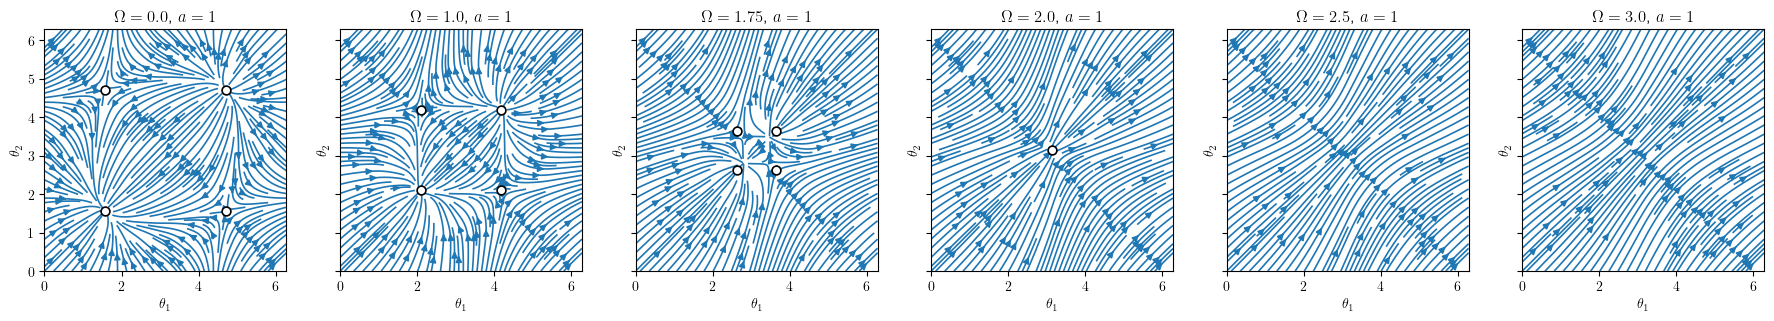

In [12]:
Omegas = [0.0, 1.0, 1.75, 2.0, 2.5, 3.0]
fig, axes = plt.subplots(1, 6, figsize=(18, 3), sharex=True, sharey=True)
for ax, Om in zip(axes, Omegas):
    plot_phase_portrait(ax, Om, a=1.0, n=9)
plt.tight_layout()
plt.show()

**6.6.10**<span style="color:red"> Is the origin a nonlinear center for the system $\dot{x} =−y−x^2 , \dot{y} = x ?$

**System**

$ \qquad\displaystyle \dot x=-y-x^2,\qquad \dot y=x .$

1. **Linear test.**
   The Jacobian at $(0,0)$ is

$ \qquad\displaystyle J= \begin{pmatrix} \displaystyle\frac{\partial x_{n+{\tiny 1}}}{\partial x} & \displaystyle\frac{\partial x_{n+{\tiny 1}}}{\partial y} \\ \displaystyle\frac{\partial y_{n+{\tiny 1}}}{\partial x} & \displaystyle\frac{\partial y_{n+{\tiny 1}}}{\partial y} \end{pmatrix} = \begin{pmatrix}-2x&-1\\[2pt]1&0\end{pmatrix}.$

$ \qquad\displaystyle J(0,0) = \begin{pmatrix}0&-1\\[2pt]1&0\end{pmatrix},$ 

with eigenvalues $\pm i$. So the linearization is a center.

2. **Exact first integral (nonlinear proof).**

Consider

$ \qquad\displaystyle H(x,y)=e^{2y}\Big(x^2+y-\tfrac12\Big).$

Then, along any trajectory,

$ \qquad\displaystyle \frac{dH}{dt}=H_x\dot x+H_y\dot y =\big(2xe^{2y}\big)(-y-x^2)+\big(e^{2y}(2x^2+1)\big)x =0.$

Hence $H$ is conserved and the orbits are its level curves

$ \qquad\displaystyle e^{2y}\Big(x^2+y-\tfrac12\Big)=\text{const}.$

Near $(0,0)$,

$ \qquad\displaystyle H=-\tfrac12 + x^2 + \mathcal{O}(|(x,y)|^3),$

so the level sets $H=-\tfrac12+\varepsilon$ are closed ovals surrounding the origin. Therefore the origin is a **center** (neutrally stable), not a focus.


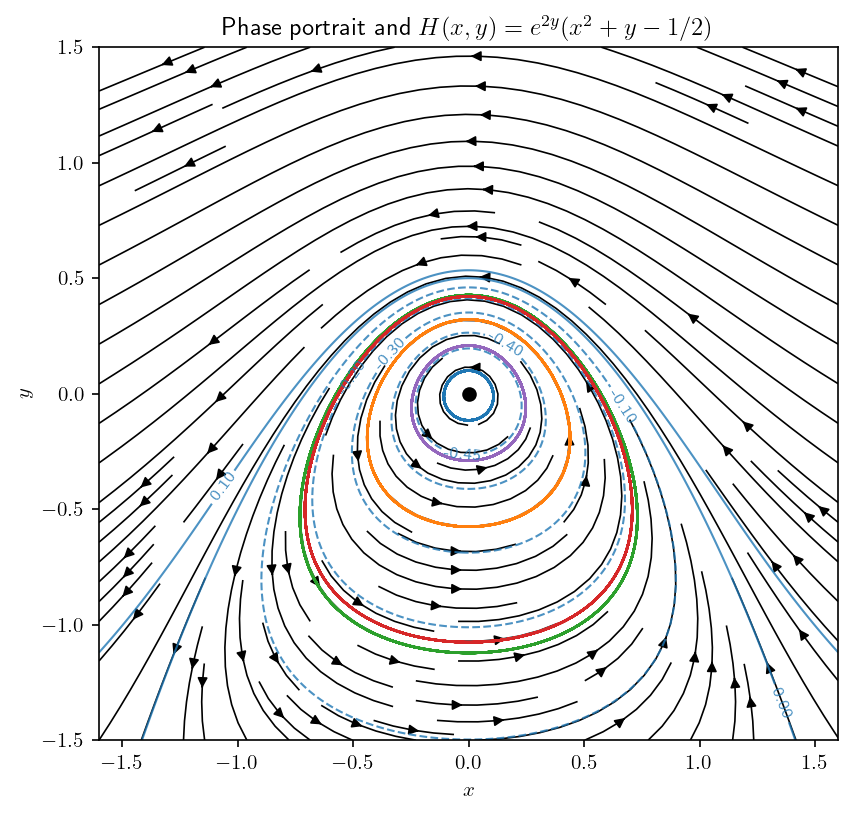

In [13]:
def f(t, state, const=1):
    x, y = state
    return np.array([-y - x**2, x], dtype=float)

def H(x, y):
    return np.exp(2*y)*(x**2 + y - 0.5)

xmax   = 1.6
ymax   = 1.5
nx, ny = 400, 300
x      = np.linspace(-xmax, xmax, nx)
y      = np.linspace(-ymax, ymax, ny)
X, Y   = np.meshgrid(x, y)
U, V   = -Y - X**2, X
Hvals  = H(X, Y)              # H values (for contour)

fig, ax = plt.subplots(1,1, figsize=(7,6), dpi=150)
ax.streamplot(x, y, U, V, density=1.2, color='k', linewidth=0.8, arrowsize=1) # streamplot
levels = [-0.45, -0.4, -0.3, -0.2, -0.1, 0.0, 0.1]
cs = ax.contour(X, Y, Hvals, levels=levels, colors=('C0',), linewidths=1.0, alpha=0.8)
ax.clabel(cs, fmt='%0.2f', fontsize=8)                     # contour H-levels

inits = [[0.0, 0.1], [0.4, 0.0], [0.6, -0.05], [-0.5, 0.1], [0.2, -0.2]]
for ic in inits:
    _, sol = RK4(f, (0, 80), 0.01, np.array(ic), None,float)
    ax.plot(sol[:,0], sol[:,1], '-', linewidth=1.2)

ax.plot(0,0,'ko', ms=6)                   # mark origin
ax.set_title('Phase portrait and $H(x,y)=e^{2y}(x^2+y-1/2)$', fontsize=12)
ax.set_xlabel('$x$'); ax.set_ylabel('$y$')
ax.set_xlim(-xmax, xmax); ax.set_ylim(-ymax, ymax)
ax.set_aspect('equal', adjustable='box')
plt.show()

**8.7** <span style="color:red">Consider the vector field given in polar coordinates by $\dot{r}= r(1−r^2), \dot{\theta} =1 .$                                  
Let $S$ be the positive $x-$axis, and compute the Poincaré map.                                                                                                                    
Show that the system has a unique periodic orbit and classify its stability.

Let $r_{\tiny 0}$ be an initial condition on $S$.                                                                                                       
Since $\dot{\theta}=1$ , the first return to $S$ occurs after a time of flight $t=2\pi$.                     
Then $r_{\tiny 1} = P ( r_{\tiny 0} ),$ where $r_1$ satisfies

$ \qquad\qquad\qquad\qquad\displaystyle \int_{r_{\tiny 0}}^{r_{\tiny 1}} \frac{dr}{r(1-r^2)} = \int_0^{2\pi} dt = 2\pi $
  
Evaluation of the integral below yields $\displaystyle r_{\tiny 1}=\left[ 1 + e^{4\pi}\left(r_{\tiny 0}^{-2} - 1 \right) \right]^{-1/2}$.                    
Hence $P(r)=\left[ 1 + e^{4\pi}\left(r^{-2} - 1 \right) \right]^{-1/2}$.

 

**8.7.1**<span style="color:red"> Use partial fractions to evaluate the integral $\displaystyle \int_{r_{\tiny 0}}^{r_{\tiny 1}} \frac{dr}{r(1-r^2)}$ and show that $\displaystyle r_{\tiny 1}=\left[ 1 + e^{4\pi}\left(r_{\tiny 0}^{-2} - 1 \right) \right]^{-1/2}$ . Then confirm that $P'(r^{*})=e^{-4\pi}$

We are given in polar coordinates

$ \qquad\displaystyle\dot r = r(1-r^2),\qquad \dot\theta = 1,$

and we take the positive $x$-axis $S$ as the Poincaré section (i.e. $\theta=0$ mod $2\pi$).                                                             
For an initial point on $S$ with radius $r_0>0$, the trajectory returns to $S$ after time $T=2\pi$ because $\dot\theta=1$.                                  
The Poincaré map $P$ is therefore given by $r_1=P(r_0)$ where $r(t)$ solves the radial ODE and $r(0)=r_0,\ r(2\pi)=r_1$.

From separation of variables

$ \qquad\displaystyle\int_{r_{\tiny 0}}^{r_{\tiny 1}}\frac{dr}{r(1-r^2)}=\int_0^{2\pi}dt=2\pi.$

Partial fraction decomposition: factor the denominator and write

$ \qquad\displaystyle\frac{1}{r(1-r^2)}=\frac{1}{r(1-r)(1+r)}=\frac{A}{r}+\frac{B}{1-r}+\frac{C}{1+r}.$

Solving (or using a quick substitution) gives

$ \qquad\displaystyle A=1,\qquad B=\tfrac12,\qquad C=-\tfrac12,$

so $ \quad\displaystyle\frac{1}{r(1-r^2)}=\frac{1}{r}+\frac{1}{2(1-r)}-\frac{1}{2(1+r)}.$

Integrate:

$\qquad\begin{aligned}\displaystyle\int\frac{dr}{r(1-r^2)} &= \int_{r_{\tiny 0}}^{r_{\tiny 1}}\bigg( \frac{1}{r}+\frac{1}{2(1-r)}-\frac{1}{2(1+r)}\bigg) dr = \bigg[\ln r-\tfrac12\ln(1-r)-\tfrac12\ln(1+r)\bigg]_{r_{\tiny 0}}^{r_{\tiny 1}} \\ &= \bigg[\ln r-\tfrac12\ln(1-r^2)\bigg]_{r_{\tiny 0}}^{r_{\tiny 1}} = \bigg[\ln\!\Big(\frac{r}{\sqrt{1-r^2}}\Big)\bigg]_{r_{\tiny 0}}^{r_{\tiny 1}} = \ln\!\Bigg(\frac{r_1}{\sqrt{1-r_1^2}}\Bigg)-\ln\!\Bigg(\frac{r_0}{\sqrt{1-r_0^2}}\Bigg) \\ &= \ln\!\Bigg(\frac{r_1/\sqrt{1-r_1^2}}{\,r_0/\sqrt{1-r_0^2}\,}\Bigg)={2\pi}. \end{aligned}$


Then ,                                                                                                                                                          
$ \qquad\displaystyle\frac{r_1/\sqrt{1-r_1^2}}{\,r_0/\sqrt{1-r_0^2}\,}=e^{2\pi}.$

$ \qquad\displaystyle\frac{r_1}{\sqrt{1-r_1^2}} =e^{2\pi} \frac{r_0}{\sqrt{1-r_0^2}}.$

$ \qquad\displaystyle\frac{r_1^2}{1-r_1^2}=e^{4\pi}\,\frac{r_0^2}{1-r_0^2}. \qquad$  [ Square both sides to remove square roots ]

$ \qquad\displaystyle {r_1^2}(1-r_0^2) =e^{4\pi}\, {r_0^2}(1-r_1^2). $

$ \qquad\displaystyle {r_1^2}(1-r_0^2) - e^{4\pi}\, {r_0^2}(1-r_1^2) = 0. $

$ \qquad\displaystyle r_1^2-r_0^2r_1^2 - e^{4\pi}\, r_0^2 + e^{4\pi}\,r_0^2r_1^2 = 0. $

$ \qquad\displaystyle r_1^2-r_0^2r_1^2 + e^{4\pi}\,r_0^2r_1^2 =  e^{4\pi}\, r_0^2. $

$ \qquad\displaystyle r_1^2(1-r_0^2 + e^{4\pi}\,r_0^2) =  e^{4\pi}\, r_0^2. $

$ \qquad\displaystyle r_1^2 =   \frac{e^{4\pi}\,r_0^2}{(1-r_0^2 + e^{4\pi}\,r_0^2)}= \frac{1}{\frac{(1-r_0^2 + e^{4\pi}\,r_0^2)}{e^{4\pi}\,r_0^2}} = \frac{1}{(e^{-4\pi}\,r_0^{-2}-e^{-4\pi}\, + 1)} = \frac{1}{e^{-4\pi}\,(r_0^{-2} -1) + 1} $

$ \qquad\displaystyle\boxed{\, r_1 = \frac{1}{\sqrt{e^{-4\pi}\,(r_0^{-2} -1) + 1}} \,}$

$ \qquad\displaystyle r_{n+{\tiny 1}} = P(r_n)=\frac{1}{\sqrt{e^{-4\pi}\,(r_n^{-2} -1) + 1}} $

Therefore

$ \qquad\displaystyle\boxed{\,P(r)=\bigg[\,1 + e^{-4\pi}\,\big(r^{-2}-1\big)\bigg]^{-1/2}\,}$

Let's write $E=e^{-4\pi}$

$ \qquad\displaystyle P(r)=\big(1 + E\,(r^{-2}-1)\big)^{-1/2}.$

Differentiate:

$ \qquad\displaystyle\frac{dP}{dr}= \displaystyle -\tfrac12\big(1+E(r^{-2}-1)\big)^{-3/2}\cdot E\cdot\frac{d}{dr}(r^{-2}-1). \qquad \left[ \ \because \dfrac{d}{dr}(r^{-2}-1)=-2r^{-3} \right]$

$ \qquad\displaystyle P'(r)=E\,r^{-3}\,\big(1+E(r^{-2}-1)\big)^{-3/2}.$

The periodic orbit corresponds to a fixed point $r^*$ of $P$.                                                                                             
The obvious fixed radius is $r^*=1$ because $P(1)=[1+E(1-1)]^{-1/2}=1$.                                                                                
Evaluate $P'$ at $r^*=1$: at $r=1$ 

$ \qquad\displaystyle P'(1)=E\,(1)^{-3}\,\big[1+E\{(1)^{-2}-1\}\big]^{-3/2}=E\,(1) \,\big[1+E(1-1)\big]^{-3/2}=E\,\big[1+0\big]^{-3/2}=E.$

$ \qquad\displaystyle\boxed{\,P'(1)=E=e^{-4\pi}\,.}$


**8.7.9** <span style="color:red"> Consider the vector field given in polar coordinates by $\dot{r}= r − r^2 , \dot{\theta}=1$.                                                                     
a) Compute the Poincaré map from $S$ to itself, where $S$ is the positive $x-$axis.                                                                                  
b) Show that the system has a unique periodic orbit and classify its stability.                                                                                  
c) Find the characteristic multiplier for the periodic orbit.

#### a) Poincaré map on $S=\{\theta=0,\ r\ge 0\}$

Solve $\dot r=r(1-r)$ :

$ \qquad\displaystyle r(t)=\frac{r_0 e^{t}}{1+r_0\,(e^{t}-1)}.$

With $\dot\theta=1\Rightarrow \theta(t)=t+\theta_0$, the next hit of the positive $x$-axis occurs at time $T=2\pi$. 

Thus,$ \quad\displaystyle P(r)=r(T)=\frac{e^{2\pi}\,r}{1+(e^{2\pi}-1)\,r}.$

(Exactly what you found.)

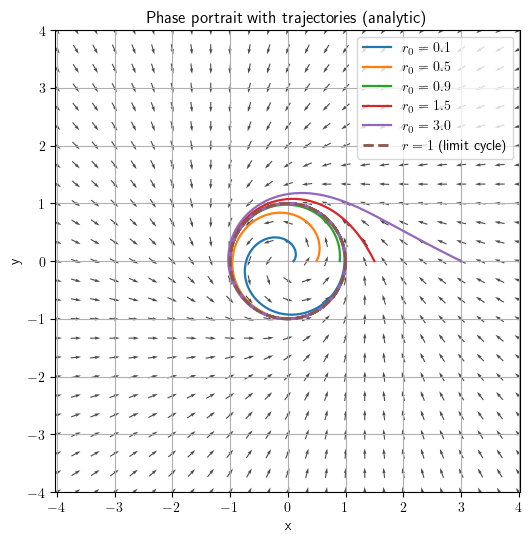

In [14]:
def r_of_t(t, r0):
    return (r0 * np.exp(t)) / (1 + r0 * (np.exp(t)-1))

T       = 2*np.pi
tmax    = 6*T
t       = np.linspace(0, tmax, 1000)
r0_list = [0.1, 0.5, 0.9, 1.5, 3.0]

plt.figure(figsize=(6,6))
x = np.linspace(-4,4,25)
y = np.linspace(-4,4,25)
X, Y = np.meshgrid(x,y)
R = np.sqrt(X**2 + Y**2)
Theta = np.arctan2(Y, X)

# dr/dt = r - r^2 ; dtheta/dt = 1  
# (dotx, doty) = (dr/dt * cos - r*sin * dtheta, dr/dt * sin + r*cos * dtheta)
drdt = R - R**2
dotx = drdt * np.cos(Theta) - R * np.sin(Theta) * 1.0
doty = drdt * np.sin(Theta) + R * np.cos(Theta) * 1.0

# normalize arrows for better visualization
mag = np.sqrt(dotx**2 + doty**2)
mag[mag==0]=1.0
plt.quiver(X, Y, dotx/mag, doty/mag, pivot='mid', alpha=0.7)

# plot trajectories from r0_list starting at theta=0 (positive x-axis)
for r0 in r0_list:
    rt = r_of_t(t, r0)
    theta_t = t  # theta(t)=t+theta0 ; take theta0=0 so start on positive x-axis
    x_traj = rt * np.cos(theta_t)
    y_traj = rt * np.sin(theta_t)
    plt.plot(x_traj, y_traj, linewidth=1.6, label=rf"$r_0={r0}$")

phi = np.linspace(0, 2*np.pi, 400)
plt.plot(np.cos(phi), np.sin(phi), linestyle='--', linewidth=2, label=r"$r=1$ (limit cycle)")
plt.axis('equal')
plt.xlim(-4,4); plt.ylim(-4,4)
plt.xlabel('x'); plt.ylabel('y')
plt.title('Phase portrait with trajectories (analytic)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#### b) Periodic orbits and stability

Fixed points of $P$: solve $P(r)=r$ :

$ \qquad\displaystyle\frac{e^{2\pi}r}{1+(e^{2\pi}-1)r}=r \ \Longrightarrow\ r=0\ \text{or}\ r=1.$

* $r=0$ corresponds to the equilibrium at the origin (not a periodic orbit).
* $r=1$ corresponds to the circle $r\equiv 1$, which is a periodic orbit with period $2\pi$.

Uniqueness: Any closed orbit would require $r(t)$ constant (because $\theta$ increases monotonically).                                               
The only constant $r$ allowed by $\dot r=r(1-r)$ are $r=0,1$.                                                                                             
Hence the **unique periodic orbit** is the unit circle $r=1$.

Stability via the Poincaré map derivative :

$ \qquad\displaystyle P'(r)=\frac{e^{2\pi}}{\big(1+(e^{2\pi}-1)r\big)^2}$

$ \qquad\displaystyle P'(1)=e^{-2\pi}\in(0,1),\quad P'(0)=e^{2\pi}>1. $

So the limit cycle $r=1$ is **asymptotically stable (attracting)**, and the origin is **repelling**.


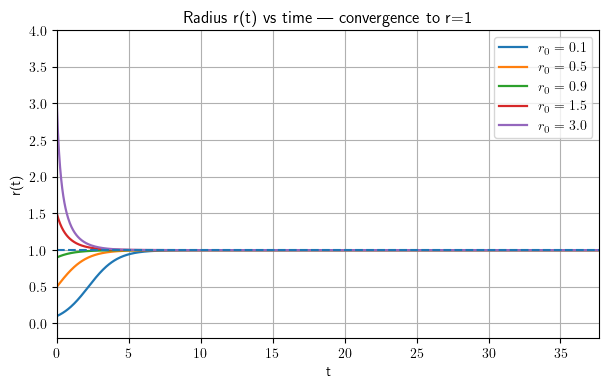

In [15]:
plt.figure(figsize=(7,4))
for r0 in r0_list:
    rt = r_of_t(t, r0)
    plt.plot(t, rt, linewidth=1.6, label=rf"$r_0={r0}$")
plt.hlines(1, 0, tmax, linestyles='--')
plt.xlabel('t'); plt.ylabel('r(t)')
plt.title('Radius r(t) vs time --- convergence to r=1')
plt.xlim(0,tmax)
plt.ylim(-0.2, max(4, max(r0_list)+1))
plt.legend()
plt.grid(True)
plt.show()

#### c) Characteristic multiplier

The (nontrivial) Floquet/characteristic multiplier is the derivative of the Poincaré map at the fixed point :

$ \qquad\displaystyle\mu=P'(1)=e^{-2\pi}.$

(As usual in planar systems there is also the trivial multiplier $1$ corresponding to phase along the orbit.)


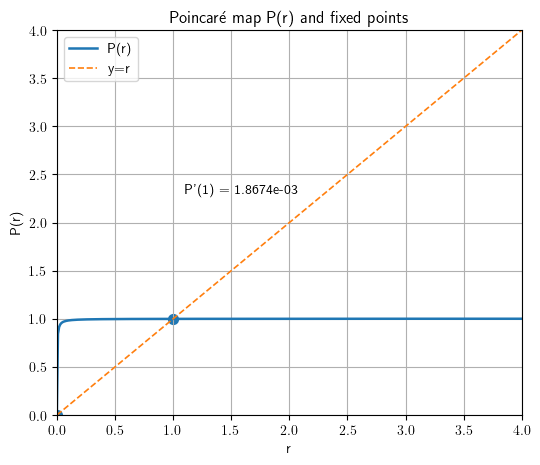

In [16]:
r_vals = np.linspace(0,4,400)
e2p = np.exp(2*np.pi)
P = (e2p * r_vals) / (1 + (e2p - 1)*r_vals)
plt.figure(figsize=(6,5))
plt.plot(r_vals, P, linewidth=1.8, label='P(r)')
plt.plot(r_vals, r_vals, linestyle='--', linewidth=1.2, label='y=r')
# mark fixed points (r=0 and r=1)
plt.scatter([0,1],[0,1], marker='o', s=50)
# annotate multiplier (derivative) at r=1
Pprime_at1 = e2p / (1 + (e2p-1)*1)**2
plt.annotate(f"P'(1) = {Pprime_at1:.4e}", xy=(1,1), xytext=(1.1, 2.3))

plt.xlabel('r'); plt.ylabel('P(r)')
plt.title('Poincaré map P(r) and fixed points')
plt.xlim(0,4); plt.ylim(0,4)
plt.legend()
plt.grid(True)
plt.show()

**8.7.11** <span style="color:red">(Reversibility and the in-phase periodic state of a Josephson array)                                                                                    
Use a reversibility argument to prove that the in-phase periodic state of (8.7.1) is not attracting, even if the nonlinear terms are kept.

we know that the linearization of the in-phase fixed point of Equation 8.7.1

$ \qquad\displaystyle\frac{d\phi_{\tiny i}}{dt}=\Omega + a\sin\phi_{\tiny i}+\frac{1}{N}\sum_{j=1}^N\sin\phi_{\tiny j} \ ,\quad \text{ for } i=1,2.$

predicts a center.

a higher-order system $\dot{x} = f(x)$ is reversible if it is invariant under the transformation                                                                    
$ \qquad\displaystyle t\rightarrow -t \quad x\rightarrow R(x)$ where $R^2(x)=x$

The simplest choice, $R(x) = -x$, doesn't work, but $R(x) = \pi - x$ does.

$ \qquad\displaystyle R^2(x)=R(\pi-x)=\pi-(\pi-x)=x$

$ \qquad\qquad\displaystyle\frac{d\phi_{\tiny i}}{dt}\rightarrow\frac{d(\pi-\phi_{\tiny i})}{-dt} = \frac{-d\phi_i}{-dt} = \frac{d\phi_i}{dt} $

$ \qquad\displaystyle \Omega + a\sin\left(\pi-\phi_{\tiny i}\right)+\frac{1}{N}\sum_{j=1}^N\sin\left(\pi-\phi_{\tiny j}\right)=\Omega + a\sin\phi_{\tiny i}+\frac{1}{N}\sum_{j=1}^N\sin\phi_{\tiny j} \qquad\qquad \left[ \ \because \sin\left(\pi-\phi_{\tiny i}\right) = \sin\phi_{\tiny i} \right]$

the linear center is a nonlinear center; i.e., the in-phase state is not attracting.

**8.7.2** <span style="color:red">Consider the vector field on the cylinder given by $\dot{\theta}=1, \, \dot{y}=ay$.                                                                  
Define an appropriate Poincaré map and find a formula for it.                                                                                       
Show that the system has a periodic orbit. Classify its stability for all real values of $a$.

We are given the system on the **cylinder** $(\theta, y)$:

$ \qquad\displaystyle\dot{\theta} = 1, \quad \dot{y} = a y, \quad a \in \mathbb{R}.$

A **Poincaré section** is usually taken at a fixed value of $\theta$. Since $\theta$ increases uniformly ($\dot\theta=1$), a natural choice is:

$ \qquad\displaystyle\Sigma = \{ (\theta, y) \mid \theta = 0 \mod 2\pi \}.$

Let $y_n$ denote the **value of $y$ each time the trajectory crosses $\Sigma$** (i.e., $\theta = 0$ mod $2\pi$).

The **Poincaré map** $P$ maps $y_n \mapsto y_{n+1}$ after one period $T = 2\pi$:

$ \qquad\displaystyle y_{n+1} = P(y_n).$

The ODE for $y$ is linear:

$ \qquad\displaystyle \dot{y} = a y \quad \implies \quad y(t) = y_n e^{a t}.$

After **time $T = 2\pi$** (one full rotation in $\theta$):

$ \qquad\displaystyle y_{n+1} = y_n e^{a T} = y_n e^{2\pi a}.$

So the **Poincaré map is**:

$ \qquad\displaystyle\boxed{P(y) = y e^{2\pi a}}.$

A **periodic orbit** corresponds to a fixed point of $P$:

$ \qquad\displaystyle y^* = P(y^*) \implies y^* = y^* e^{2\pi a}.$

* If $y^* \neq 0$, then $e^{2\pi a} = 1 \implies a = 0$.
* For $a \neq 0$, the **only fixed point is $y^* = 0$**.

Thus, the system always has a **periodic orbit at $y=0$** (the cylinder “circle” at $y=0$).

* The stability of the fixed point of the Poincaré map is determined by $|P'(y^*)|$:

$ \qquad\displaystyle P'(y) = e^{2\pi a} \quad \implies \quad P'(0) = e^{2\pi a}.$

* **Stable** if $|P'(0)| < 1 \implies e^{2\pi a} < 1 \implies a < 0$.
* **Unstable** if $|P'(0)| > 1 \implies e^{2\pi a} > 1 \implies a > 0$.
* **Neutrally stable** if $a = 0$, i.e., $P'(0) = 1$.

 So the periodic orbit at $y=0$ exists for all $a$ and its stability depends on the sign of $a$.


| $a$     | Fixed point $y^*$ | Stability of $y^*=0$      |
| ------- | ----------------- | ------------------------- |
| $a < 0$ | 0                 | Stable                    |
| $a = 0$ | 0                 | Neutrally stable (center) |
| $a > 0$ | 0                 | Unstable                  |



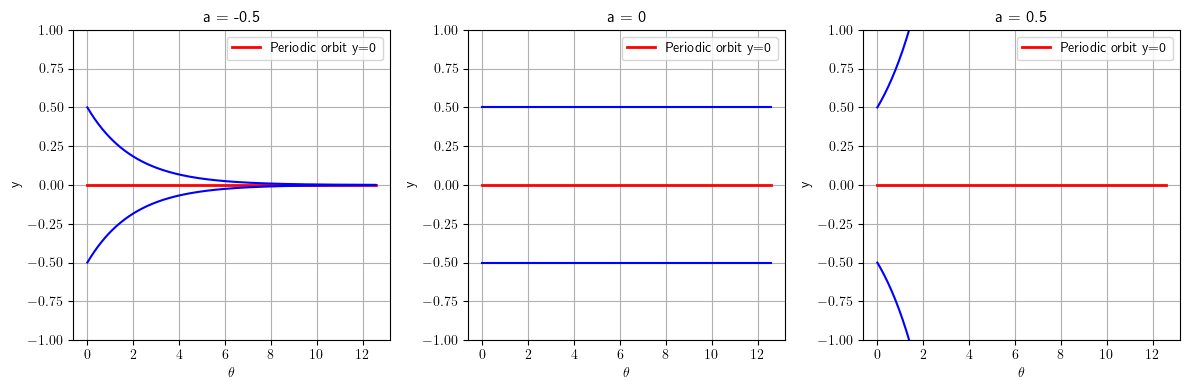

In [17]:
a_values = [-0.5, 0, 0.5]             # stable, neutral, unstable
theta = np.linspace(0, 4*np.pi, 400)  # wrap twice for clarity

plt.figure(figsize=(12, 4))

for i, a in enumerate(a_values):
    plt.subplot(1, 3, i+1)    
    plt.plot(theta, np.zeros_like(theta), 'r', lw=2, label='Periodic orbit y=0')    
    y0 = [0.5, -0.5]
    for y_init in y0:
        y = y_init * np.exp(a * theta)  # solve y(t) = y0*exp(a*t)
        plt.plot(theta, y, 'b')
    plt.title(f'a = {a}')
    plt.xlabel(r'$\theta$')
    plt.ylabel('y')
    plt.grid(True)
    plt.ylim(-1, 1)
    plt.legend()
plt.tight_layout()
plt.show()

**8.7.12** <span style="color:red">(Globally coupled oscillators)                                                                                                                    
Consider the following system of $N$ identical oscillators :

<span style="color:red">$ \qquad\displaystyle\dot{\theta_{\tiny i}}=f(\theta_{\tiny i}) + \frac{K}{N}\sum_{j=1}^N f(\theta_{\tiny j}) \ ,\quad \text{ for } i=1,2,\dots,N.$

<span style="color:red">where $K>0$ and $f(\theta)$ is smooth and $2\pi-$periodic.                                                                                               
Assume that $f(\theta)>0$ for all $\theta$ so that the in-phase solution is periodic.                                                                      
By calculating the linearized Poincaré map as in Example 8.7.4, show that all the characteristic multipliers equal $+1$.                                  
Thus the neutral stability found in Example 8.7.4 holds for a broader class of oscillator arrays.                                                           
In particular, the reversibility of the system is not essential. This example is from **Tsang et al. (1991)**.

**In-phase solution**

Assume all oscillators are equal:

$ \qquad\displaystyle\theta_1 = \theta_2 = \dots = \theta_N = \Theta(t)$

Then the system reduces to:

$ \qquad\displaystyle\dot{\Theta} = f(\Theta) + K f(\Theta) = (1+K) f(\Theta)$

Since $f(\Theta)>0$, $\Theta(t)$ increases monotonically and is **periodic modulo $2\pi$**.
This is the **in-phase periodic orbit**.

**Linearize around in-phase orbit**

Introduce small perturbations,$ \qquad\displaystyle \theta_i = \Theta + \delta_i, \quad |\delta_i| \ll 1$

Linearizing,$ \qquad\displaystyle \dot{\delta_i} = f'(\Theta) \Big( \delta_i + \frac{K}{N} \sum_{j=1}^N \delta_j \Big)$

**Decouple directions**

Define , $ \qquad\displaystyle p = \frac{1}{N} \sum_j \delta_j \quad \text{(in-phase direction)}, \quad q_i = \delta_i - p \quad \text{(orthogonal directions)}$

Then, $ \qquad\displaystyle\dot{p} = (1+K) f'(\Theta) p, \quad \dot{q_i} = f'(\Theta) q_i$

**Integrate over one period $T$**

Use $\dot{\Theta} = (1+K) f(\Theta)$ to change variables from $t$ to $\Theta$,

$ \qquad\displaystyle\frac{dp}{p} = \frac{(1+K) f'(\Theta)}{\dot{\Theta}} d\Theta = \frac{(1+K) f'(\Theta)}{(1+K) f(\Theta)} d\Theta = \frac{f'(\Theta)}{f(\Theta)} d\Theta$

Integrate over one period, $ \quad\displaystyle\int_0^T \frac{dp}{p} = \int_0^{2\pi} \frac{f'(\Theta)}{f(\Theta)} d\Theta = \ln f(2\pi) - \ln f(0) = 0$

$\qquad\qquad\qquad\qquad\implies p(T) = p(0)$, similarly $q_i(T) = q_i(0)$.

**Characteristic multipliers**

* The **linearized Poincaré map** over one period is,$ \quad \displaystyle\delta(T) = \boldsymbol{M} \, \delta(0)$

* For in-phase direction, $\qquad\displaystyle\mu_p = \frac{p(T)}{p(0)} = 1$
* For orthogonal directions, $\quad\displaystyle\mu_{q_{\tiny i}} = \frac{q_i(T)}{q_i(0)} = 1$

 Hence, **all characteristic multipliers = 1**.
